Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


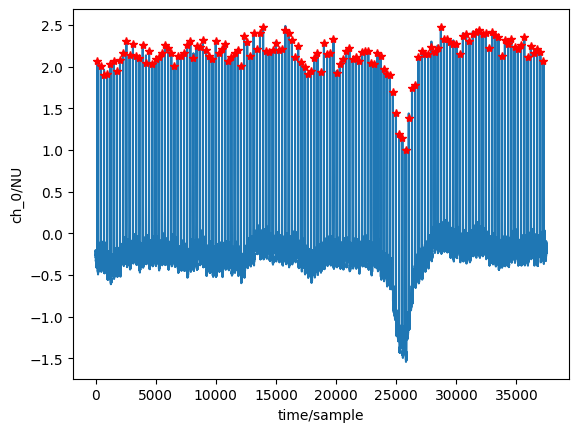

In [3]:
import wfdb
import math
from wfdb import processing  # for xqrs detection


rmeans = {'filename': 'rmean'}
rstandard_deviation = {'filename': 'rstd'}
rinvalid = []


def mean_std(file_path, file_name, start, stop):

    file_destination = file_path+file_name
    sig, fields = wfdb.rdsamp(file_destination, channels=[
                              0], sampfrom=start, sampto=stop)
    xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
    xqrs.detect()

    # print(fields)
    wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds]  )

    # sqrs.qrs_inds is array containing indexes of qrs ?

    rpeaksum = 0
    for i in xqrs.qrs_inds:
        rpeaksum += sig[i]
    try:
        rmean = (rpeaksum/len(xqrs.qrs_inds))
        rmeans[file_name] = float(rmean)
        rstdsum = 0
        for i in xqrs.qrs_inds:
            rstdsum += (sig[i]-rmean)**2
        rstd = math.sqrt(rstdsum/len(xqrs.qrs_inds))
        # print("standard deviation is",rstd)
        rstandard_deviation[file_name] = float(rstd)

    except ZeroDivisionError:
        rinvalid.append(file_name)


def main():
    file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
    file_name = "\cu01"
    file_destination = file_path+file_name
    stop = 53542-7500
    start = stop - 37500  # 7500 samples = 30 seconds
    mean_std(file_path, file_name, start, stop)
    # print(rmeans)
    # print(rinvalid)
    # print(rstandard_deviation)


main()


Area??


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


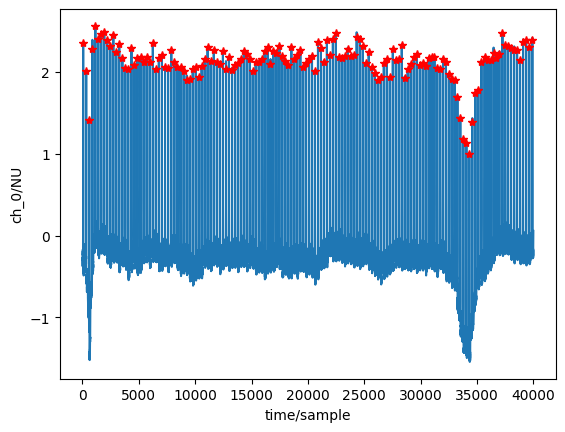

In [25]:
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
sig, fields = wfdb.rdsamp(file_destination, channels=[0], sampto=40000)
xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])


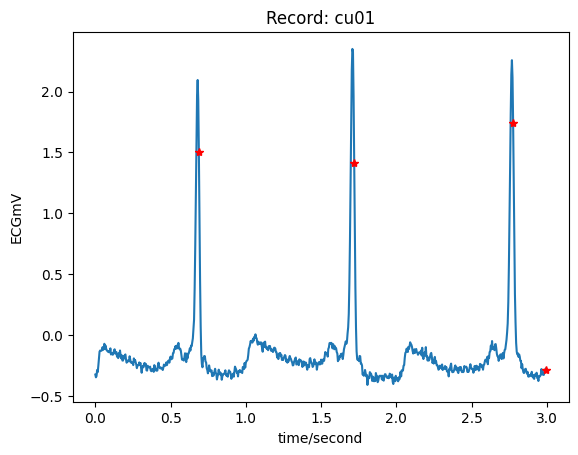

In [1]:
import wfdb
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 750  # 7500 samples = 30 seconds
record = wfdb.rdrecord(file_destination, sampfrom=start, sampto=stop)
annotation = wfdb.rdann(file_destination, 'atr',
                        sampfrom=start, sampto=stop, shift_samps=True)
wfdb.plot_wfdb(record=record,
               annotation=annotation,
               time_units='seconds')


In [14]:
import wfdb
import wfdb.processing as wp

# record = wfdb.rdrecord('filename')  # Replace 'filename' with the name of your ECG record
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 750  # 7500 samples = 30 seconds
record = wfdb.rdrecord(file_destination, sampfrom=start, sampto=stop)
signal = record.p_signal[:, 0]  # Extract the first channel of the signal

# Find R-peaks using the gqrs algorithm
qrs_inds = wp.gqrs_detect(sig=signal, fs=record.fs)

import numpy as np

peak_areas = []
for i in range(len(qrs_inds)-1):
    peak_start = qrs_inds[i]
    peak_end = qrs_inds[i+1]
    peak_signal = signal[peak_start:peak_end]
    peak_area = np.trapz(peak_signal)
    peak_areas.append(peak_area)
print(peak_areas)


[-1.33]


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


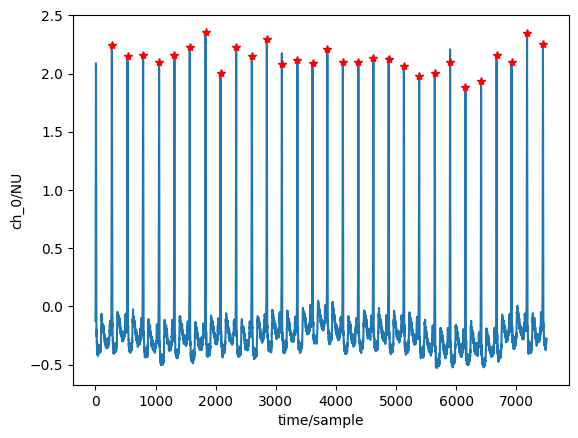

[ 272  533  792 1058 1313 1568 1831 2080 2340 2600 2850 3099 3358 3610
 3856 4114 4372 4621 4875 5129 5383 5643 5897 6154 6413 6671 6920 7177
 7442]
[15.5825, 15.232499999999998, 15.63, 12.214999999999998, 12.90875, 13.54125, 13.511249999999999, 11.208749999999998, 13.15375, 13.568750000000001, 14.303749999999999, 12.7, 12.075, 12.86125, 14.991250000000003, 12.641250000000003, 11.62125, 13.917499999999999, 13.931249999999999, 13.28125, 12.79375, 10.16375, 12.52375, 8.96625, 8.4725, 11.996249999999996, 12.1425, 15.466250000000002, 15.47]


In [49]:
import wfdb
import math
from wfdb import processing  # for xqrs detection
import numpy as np

file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 7500  # 7500 samples = 30 seconds


sig, fields = wfdb.rdsamp(file_destination, channels=[0], sampfrom=start, sampto=stop)
xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
xqrs.detect()
# wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])
print(xqrs.qrs_inds)


peak_areas = []
for i in range(len(xqrs.qrs_inds)):
    peak_start = xqrs.qrs_inds[i]-10
    peak_end = xqrs.qrs_inds[i]+10
    # print(peak_start, peak_end)
    peak_signal = sig[peak_start:peak_end]
    # wfdb.plot_items(signal=peak_signal)
    # print(peak_signal.flatten())
    peak_area = np.trapz(peak_signal.flatten())
    peak_areas.append(peak_area)
    # print("area", peak_area)


FEAUTURE EXTRACTION MAIN CODE

In [71]:
import wfdb
import math
from wfdb import processing  # for xqrs detection
import statistics
import csv


def writecsv(filename:str, data:dict):
    with open(filename , 'w') as f:
        for key, value in data.items():
            f.write(f'{key},{value}\n')


rmeans = {'filename': 'rmean'}
rstandard_deviation = {'filename': 'rstd'}
rinvalid = []
peak_areas_sum = {'filename': 'peak_areas_sum'}
peak_areas_std={'filename':'peak_areas_std'}




def mean_std(file_path, file_name, start, stop):
    peak_areas=[]

    file_destination = file_path+file_name
    sig, fields = wfdb.rdsamp(file_destination, channels=[
                              0], sampfrom=start, sampto=stop)
    xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
    xqrs.detect()
    
    # print(fields)
    # wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds]  )

    # sqrs.qrs_inds is array containing indexes of qrs ?

    rpeaksum = 0
    for i in xqrs.qrs_inds:
        rpeaksum += sig[i]
    try:
        rmean = (rpeaksum/len(xqrs.qrs_inds))
        rmeans[file_name] = float(rmean)
        rstdsum = 0
        for i in xqrs.qrs_inds:
            rstdsum += (sig[i]-rmean)**2
        rstd = math.sqrt(rstdsum/len(xqrs.qrs_inds))
        # print("standard deviation is",rstd)
        rstandard_deviation[file_name] = float(rstd)
        
        
        
#finding peak areas
        
        peak_areas = []
        for i in range(len(xqrs.qrs_inds)):
            peak_start = xqrs.qrs_inds[i]-10
            peak_end = xqrs.qrs_inds[i]+10
            # print(peak_start, peak_end)
            peak_signal = sig[peak_start:peak_end]
            # wfdb.plot_items(signal=peak_signal)
            # print(peak_signal.flatten())
            peak_area = np.trapz(peak_signal.flatten())
            peak_areas.append(abs(peak_area))
            # print("area", peak_area)
        peak_areas_sum[file_name]=sum(peak_areas)
        peak_areas_std[file_name]=statistics.stdev(peak_areas)
        

    except ZeroDivisionError:
        rinvalid.append(file_name)



    
    
    
    



def main():
    vf_starting_positions = [53542, 116430, 38828, 89692, 46089, 45502, 106603, 59784, 79128, 92797, 65324, 106814, 101448, 63706,
     95665, 102454, 61059, 14062, 84529, 83589, 89146, 105332, 36382, 949545, 6859, 11858, 101252, 96996, 102894]
    file_numbers=[1,3,4,5,6,7,8,9,10,11,12,13,15,16,17,19,20,21,22,23,24,25,26,29,30,32,33,34,35]
    file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0\cu"
    
    short=[]
    for i in range(len(file_numbers)):
        
        
        file_name = str("%02d" % (file_numbers[i],))
                
        if file_numbers[i]==29:
            continue
        if vf_starting_positions[i]>37500:
            stop = vf_starting_positions[i]-7500 # 7500 samples = 30 seconds
            start = stop - 30000  # 30000 samples = 120 seconds
            print("**************************************************",file_name)
            mean_std(file_path, file_name, start, stop)
        else:
            print("short",file_name,vf_starting_positions[i])
            short.append(file_name)
        
        
    print(rmeans)
    print(rinvalid)
    print(rstandard_deviation)
    print(peak_areas_sum)
    print(peak_areas_std)

    # writecsv('rmeans.csv', rmeans)
    # writecsv('rstd.csv', rstandard_deviation)
    # writecsv('peak_areas_sum.csv', peak_areas_sum)
    # writecsv('peak_areas_std.csv', peak_areas_std)
    
    


    

main()



************************************************** 01
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
************************************************** 03
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
************************************************** 04
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
************************************************** 05
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
************************************************** 06
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters